# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №1 - Метод k-средних, предобработка признаков


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter("ignore")

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

#### Задание 1 (5 баллов)

Имплементируйте метод k-means

In [92]:
from sklearn.base import ClusterMixin, BaseEstimator
from sklearn.metrics.pairwise import distance_metrics

class Kmeans(BaseEstimator, ClusterMixin): 
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric_func = distance_metrics()[metric]
        self.max_iter = max_iter

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        np.random.seed(self.random_state)
        
        self.labels = np.empty(X.shape[0])
        self.centroids = X[np.random.randint(X.shape[0], size=self.k),:]
        
        for _ in xrange(self.max_iter):
            prev_labels = self.labels
            self.labels = self.predict(X)
            if (prev_labels == self.labels).all():
                break
            else:
                for i in xrange(self.centroids.shape[0]):
                    self.centroids[i] = X[self.labels == i].mean(axis=0)
        
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        labels = np.empty(X.shape[0])
        for i, elem in enumerate(X):
            labels[i] = self.metric_func(self.centroids, elem).argmin()
        return labels

#### Задание 2 (1 балл) 

Проверьте вашу имплементацию на простых данных

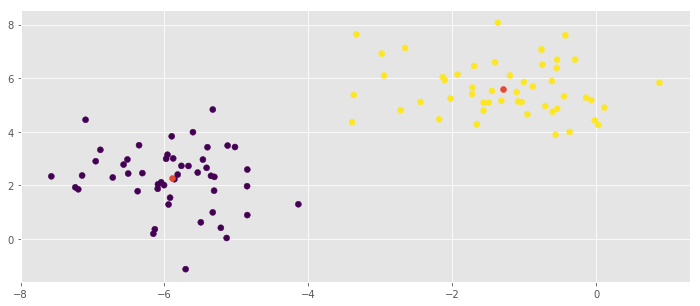

In [69]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

plt.scatter(X[:, 0], X[:, 1], c=y)

classifier = Kmeans(random_state=0)
classifier.fit(X)
plt.scatter(classifier.centroids[:, 0], classifier.centroids[:, 1])

#### Задание 3 (4 балла)

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [70]:
df_sns = pd.read_csv('hw1_snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

Задачи:
* Удалите все признаки кроме 36 ключевых слов.

In [74]:
df_main = df_sns.iloc[:, 4:]
df_main.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.

In [75]:
df_norm = (df_main - df_main.mean()) / df_main.std()
df_norm.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
1,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,1.067374,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
2,-0.332212,1.060031,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,2.027874,-0.220399,-0.174905
3,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,-0.487306,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,-0.220399,-0.174905
4,-0.332212,-0.357691,-0.24287,-0.217924,-0.223666,-0.259966,-0.207324,-0.201127,-0.168936,-0.297118,...,-0.050936,-0.369909,2.273635,-0.314193,-0.201473,-0.183029,-0.294788,-0.261526,2.285084,2.719271


* Используйте метод k-means чтобы выделить 9 кластеров

In [144]:
classifier = Kmeans(9)
classifier.fit(df_norm.values)

Kmeans(k=9, max_iter=1000, metric=None, random_state=None)

* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)

In [115]:
df_centroids = pd.DataFrame(classifier.centroids, columns=df_norm.columns)
df_centroids.idxmax(axis=1)

0           hot
1        blonde
2      shopping
3     hollister
4         bible
5         drunk
6        kissed
7      marching
8    basketball
dtype: object

2 кластер (shopping) -- любители делать покупки.

Вероятно, 8 кластер -- спортсмены. Убедимся, что в целом спорт (не только баскетбол) лидирует в 8 кластере:

In [143]:
df_centroids.loc[8:8, ('basketball','football','soccer','softball','volleyball','swimming','cheerleading','baseball','tennis','sports')]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports
8,1.429999,1.313087,0.471298,1.125241,1.047954,0.083627,0.091215,1.289376,0.136405,1.118068


Все верно, спортивные показатели больше 0 -- это кластер спортсменов.

Рассмотрим основные интересы кластера marching:

In [151]:
centroid_marching = df_centroids.iloc[7]
centroid_marching[centroid_marching > 0]

football    0.024444
swimming    0.042427
tennis      0.010946
dance       0.019158
band        3.400270
marching    4.834610
music       0.385822
rock        0.135536
god         0.027840
church      0.007854
dress       0.007985
death       0.009993
Name: 7, dtype: float64

Если интерпретировать marching как "походы" (а не "марширование"), то в совокупности с высоким показателем band этот кластер объединяет людей, заинтересованных в активном времяпрепровождении / общении. (Хотя, как выяснено дальше, это самый маленький кластер и поэтому его сложно интерпретировать.)

Кластер bible намекает на религиозных людей. Проверим, что другие "религиозные показатели" у них тоже неорицательны:

In [156]:
df_centroids.loc[4:4, ('god', 'church', 'jesus', 'bible')]

,god,church,jesus,bible
4,3.210538,2.369505,3.380322,4.633219


Рассмотрим основные показатели кластера blonde:

In [161]:
centroid_blonde = df_centroids.iloc[1]
centroid_blonde.sort_values(ascending=False)  # пришлось сортировать, потому что значений > 0 вообще нет

blonde         -0.029698
tennis         -0.043490
jesus          -0.076911
soccer         -0.078891
bible          -0.083651
death          -0.088452
die            -0.100770
sexy           -0.103153
sex            -0.104089
swimming       -0.104568
drugs          -0.116204
god            -0.117242
cheerleading   -0.119441
volleyball     -0.127020
rock           -0.127537
band           -0.129022
softball       -0.130111
marching       -0.134996
church         -0.137744
kissed         -0.140867
baseball       -0.141754
abercrombie    -0.149297
sports         -0.152297
music          -0.155413
hollister      -0.158936
hot            -0.159329
dress          -0.175517
dance          -0.186583
basketball     -0.188971
football       -0.193154
mall           -0.205146
clothes        -0.212428
cute           -0.220173
drunk          -0.220399
hair           -0.222593
shopping       -0.264331
Name: 1, dtype: float64

Особенно ничем не выделяются, на втором месте tennis, на третьем jesus, поэтому выделить конкретные интересы сложно. Вероятно, кластер небольшой, оценим его размер:

In [167]:
float(len(classifier.labels[classifier.labels == 1])) / len(classifier.labels)

0.04126666666666667

Всего 4%, что меньше среднего размера кластера 100 / 9 ~= 11%. Сразу выясним это для всех кластеров.

In [173]:
for i in xrange(len(classifier.centroids)):
    print('{0} cluster contains {1:.1f}% of all objects'.format(i, 100. * len(classifier.labels[classifier.labels == i]) / len(classifier.labels)))

0 cluster contains 3.1% of all objects
1 cluster contains 4.1% of all objects
2 cluster contains 13.0% of all objects
3 cluster contains 2.5% of all objects
4 cluster contains 7.2% of all objects
5 cluster contains 5.5% of all objects
6 cluster contains 2.8% of all objects
7 cluster contains 0.4% of all objects
8 cluster contains 61.4% of all objects


Из еще не рассмотренных кластеров большего размера остался drunk (5). Вероятно, это кластер "тусовщиков", выясним другие их интересы:

In [175]:
centroid_drunk = df_centroids.iloc[5]
centroid_drunk[centroid_drunk > 0]

cute       0.062295
sex        0.148958
sexy       0.115159
kissed     0.079173
god        0.038609
hair       0.182774
dress      0.034262
mall       0.035939
clothes    0.005979
die        0.152360
death      0.106350
drunk      3.358025
drugs      0.186303
Name: 5, dtype: float64

Особо никакие интересы больше не выделяются, просто эти ребята любят выпить :)